# Mini-Projet : Digue - Compte-rendu

## Introduction

La géométrie d'une digue est un paramètre important à considérer lors de sa construction : elle va déterminer sa tenue face aux forces de pression exercées par l'eau qu'elle retient, et donc sa solidité. Au cours de ce mini-projet, nous allons mettre en oeuvre nos compétences mathématique et informatique dans l'optique de calculer numériquement les forces subies par une digue de forme arbitraire, de sorte à déterminer la géométrie à privilégier.

Avant de débuter l'exercice de modélisation, il est nécessaire de rappeler les formules et informations clés du problème.

### a) Bilan des forces

Nous modéliserons la digue comme un bloc de béton posé sur un sol rocheux. Dans un problème de simplification, nous nous placerons en deux dimensions, et considérerons une longueur unitaire suivant l'axe perpendiculaire au plan. D'un côté, la digue retient une masse d'eau de hauteur $H$, tandis que l'autre côté est exposé à l'air. 
Voici les forces subies par la digue :


- Poids de la digue $\vec{P} = m\vec{g}$, avec $m$ la masse de la digue
- Réaction du sol rocheux $\vec{R} = \vec{N} + \vec{T}$ où $\vec{T}$ est la force de frottement (tangentielle au sol) du béton sur la roche (permettant à la digue ne pas glisser sur le sol rocheux), avec $T \le \mu_s N$, où $\mu_s$ est le coefficient de frottement statique, et $\vec{N}$ lui est normale
- Forces de pression de l'eau sur la digue $\vec{F_{P}}=P_{eau}.{S}.\vec{n}$, où $\vec{n}$ est un vecteur unitaire et $P_{eau}(x) = \rho g (H-x) + P_0$, où $P_0$ est la pression à la surface, c'est-à-dire à $H=10m$
- Forces de pression de l'air sur la digue

Nous considèrerons que les forces de pression dûes à l'air sont négligeables.


### b) Equilibre translationnel

A l'équilibre translationnel, nous avons d'après le Principe Fondamental de la Dynamique $\sum F_{ext} = m \vec{a}$. Or, $\vec{a} = \vec{0}$ d'où :

$\sum \vec{F_{ext}} = \vec{0} \implies \vec{R} + \vec{P} + \vec{F_{P}} = \vec{0} \implies \vec{N} + \vec{T} + m\vec{g} + \frac{P_{eau}}{S}\vec{n} = \vec{0}$

### c) Constantes du problème

Les grandeurs utiles que nous utiliserons pendant notre effort de modélisation sont les suivantes :

- Coefficient de friction statique béton - roche : $\mu = 0.5$
- Masse volumique du béton : $\rho_{beton}=3000 kg/{m^3}$
- Hauteur de la digue $H = 10m$
- Accélération de la pesanteur $g = 9.81 m^2/s^{-1}$
- Coordonnée de la digue côté eau $x_e = -5m$
- Coordonnée de la digue côté air $x_a = 5m$

## I. Digue en pente droite

Afin d'intégrer, dériver et projeter suivant les pentes côté air et eau, nous devons les caractériser par des fonctions mathématiques. Comme nous allons intégrer suivant la direction $y$, il est plus pertinent de définir les pentes de la digue comme étant $x = f(y)$. Nous définissons ainsi les fonctions monotones suivantes :

- $f_{air}(y)= -\frac{x_a}{H}.(y-H)$ croissante, représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
- $f_{eau}(y) = \frac{x_e}{H}.(y-H)$ décroissante, représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$.

Définissons les fonctions données ci-dessus :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensions clés
H = 10
xa = -5
xe = +5

# Fonctions
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    a1 = 3
    return (y - H) * xa / H

Créons un tableau de $y$, regroupant toutes les altitudes comprises entre 0 et $H$, puis représentons la digue sous forme graphique.

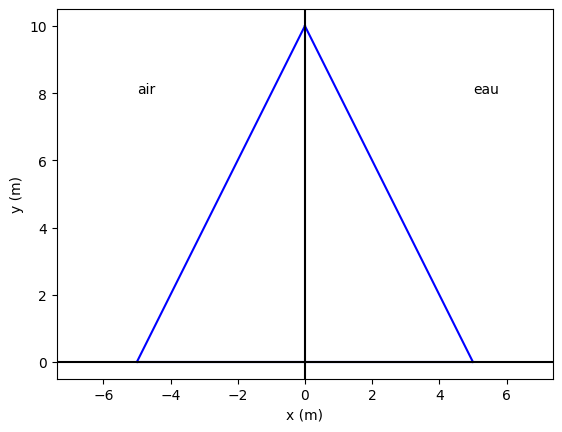

In [2]:
# Création du tableau de y
y = np.linspace(0, H, 1000)

# Tracé graphique
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal')
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

Afin de calculer le poids exercé par la digue, nous devons intégrer ces fonctions sur leurs bornes de définition. Pour savoir à quel résultat nous devons nous attendre, procédons à une résolution analytique :

$$\int_{0}^{10}f_{air} = -\int_{0}^{10}f_{eau}= [-\frac{x_a}{2H}.(y-H)^2]_0^{10}= 25$$

La surface doit ainsi correspondre, pour chaque partie de la digue, à $25 m^2$. La digue doit donc être de surface totale égale à $50 m^2$
Vérifions-le par le code :

In [3]:
# Bornes
a = -5
b = 0
c = 5

# Nombre de pas et delta_x
n = 1000
Delta_air = (b - a) / n
Delta_eau = (c - b) / n

# Nous initialisons l'intégrale
integrale = 0 

# Méthode des trapèzes (dans l'avenir, nous utiliserons la fonction np.trapz)
for i in range(n):
    f = (fair(a + (i+1) * Delta_air) + fair(a + i * Delta_air))/2
    aire_air = f * Delta_air
    integrale = integrale + np.fabs(aire_air)

for i in range(n):
    g = (feau(b + (i+1) * Delta_eau) + feau(b + i * Delta_eau))/2
    aire_eau = g * Delta_eau
    integrale = integrale + np.fabs(aire_eau)

# Longueur unitaire de la digue
L = 1

print(f"L'aire de la digue vaut {integrale:.2f} m2")
print(f"En posant L = 1m, le volume de la digue vaut {L*integrale:.2f} m3")

L'aire de la digue vaut 50.00 m2
En posant L = 1m, le volume de la digue vaut 50.00 m3


Pour calculer son poids, il suffit de suivre l'équation $P = mg = g V \rho_{beton}$, et d'utiliser les constantes données dans l'introduction.

In [4]:
p_beton =  3000 # kg/m3

m_digue = L * integrale * p_beton
Poids = 9.81 * m_digue
print(f"Le poids exercé sur la digue est de {Poids:.3e} N")

Le poids exercé sur la digue est de 1.472e+06 N


Afin de décomposer les forces de pression selon les axes du problème, nous devons trouver des vecteurs normaux aux tangentes des fonctions en tout point, qui corresponderont aux vecteurs directeurs de la force de pression locale. Soit l'angle $\theta$ entre la tangente en un point et l'axe des abscisses, s'exprimant en fonction de la dérivée de la courbe par :

$$\theta = arctan(f'(y))$$

Comme la dérivée de $f_{air}$ est constante, $\theta$ est nécessairement constant en tout point.
De plus, la projection du vecteur $\vec n$ selon $\vec{u_x}$ et $\vec{u_y}$ donne :

$$\vec n = - \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x}$$

Nous pouvons ainsi calculer la résultante des forces de pression en intégrant les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Cependant, comme nous sommes en deux dimensions, nous pouvons poser $\mathrm{d}S = L \mathrm{d}l = \mathrm{d}l$, puisque $L = 1$.
Nous obtenons ainsi :

$$\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. 
De plus, nous pouvons montrer que :

$$\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}$$

Cela implique ainsi :

- Composante selon $\vec{u_x}$: $F_{px}= \int_{0}^{H}P(y)\frac{dy}{\cos(\theta)}(-\cos(\theta))=-\int_{0}^{H}P(y)dy=-\rho_{eau}g\int_{0}^{H}ydy$ ;

- Composante selon $\vec{u_y}$: $F_{py}= \int_{0}^{H}P(y)\frac{dy}{\cos(\theta)}(-\sin(\theta))=-\tan{\theta}\int_{0}^{H}P(y)dy=\rho_{eau}g\frac{x_e}{H}\int_{0}^{H}ydy$ comme $\tan{\theta}=f'(y)$.

Codons et calculons donc tous ces termes via Python. Débutons par le calcul de $\theta$ :

In [5]:
feau_derivee = (feau(H) - feau(0)) / (H - 0)

# Nous appliquons la relation theta = arctan(f'(y))
theta = np.arctan(feau_derivee)

print(f"L'angle theta vaut, pour tout point, {np.mean(theta):.4f} rad")

L'angle theta vaut, pour tout point, -0.4636 rad


Comme $f_{eau}$ est de dérivée constante, $\theta$ est une constante : nous sommes donc dans notre droit de l'afficher en passant par sa moyenne.

In [6]:
import math as m

# Pression hydrostatique
def P(y):
    rho_eau = 1000
    g = 9.81
    H = 10
    return rho_eau * g * (H - y)

# Application de la formule de l'énoncé
cos_theta = np.cos(theta)
dl = 1 / cos_theta

# Composantes de la force de pression
F_px = -np.trapz(P(y) * np.cos(theta) * dl, y)
F_py = np.trapz(P(y) * np.sin(theta) * dl, y)

print(f"Les forces de pression valent, en u_x, {np.fabs(F_px):.3e} N")
print(f"Les forces de pression valent, en u_y, {np.fabs(F_py):.3e} N")

F_p = m.sqrt(F_px**2 + F_py**2)

print(f"La résultante des forces de pression vaut {np.fabs(F_p):.3e} N")

Les forces de pression valent, en u_x, 4.905e+05 N
Les forces de pression valent, en u_y, 2.453e+05 N
La résultante des forces de pression vaut 5.484e+05 N


Supposons que la digue est à l'équilibre statique translationnel. D'après le Principe Fondamental de la Dynamique, comme l'accélération est nulle, nous avons l'égalité : 

$$\sum \vec{F_{ext}} = m.\vec{a} = \vec{0}$$

Ainsi :

$$\sum\vec{F_{ext}}=m.\vec{0} \implies \vec{N} + \vec{P} + \vec{T} + \vec{P_{eau}} = N\vec{u_x} -mg\vec{u_x} + \mu_sN\vec{u_y} + F_{px}\vec{u_x} + F_{py}\vec{u_y} = \vec{0}$$

En projetant ces différentes forces sur leurs axes, nous avons :

$$ \begin{cases} N\vec{u_x} -mg\vec{u_x} + F_{px}\vec{u_x} = \vec{0} \\ T\vec{u_y} + F_{py}\vec{u_y} = \vec{0} \\ \end{cases} \implies \begin{cases} N = mg - F_{px}\\ T = F_{py} \\ \end{cases}$$

Utilisons cette égalité afin de calculer les composantes normales et tangentielles de la force de réaction du sol, et d'en déduire le rapport $\frac{T}{N}$, permettant de caractériser la stabilité de la digue.

In [7]:
# Équilibre mécanique
N = Poids - F_py # Réaction normale
T = F_px # Réaction tangentielle

print(f"Réaction normale (N) : {N:.2e} N")
print(f"Réaction tangentielle (T) : {np.fabs(T):.2e} N")
print(f"Rapport T/N : {abs(T/N):.3f}")

Réaction normale (N) : 1.72e+06 N
Réaction tangentielle (T) : 4.91e+05 N
Rapport T/N : 0.286


Nous avons ainsi la relation $T = 0.286N$. Or, pour que la digue soit stable, il faut que ces deu variables respectent la relation $T \le \mu N$, où $\mu = 0.5$ est le coefficient de friction statique béton-roche.
Dans le cas présent, $\frac{T}{N} \le \mu$, donc la digue est stable.
Cependant, est-ce toujours le cas en considérant la disjonction du barrage entre le côté faisant face à l'eau, et celui exposé à l'air ? Vérifions-le, en commençant par la face côté air.

In [8]:
# Constantes

rho_eau = 1000 # kg/m3
rho_beton = 3000 #kg/m3

# Bornes
a = -5
b = 0

# Calcul du poids
x_air = np.linspace(0, H, 1001)
y_air = fair(x_air)
integrale_air = np.trapz(y_air, x_air)
volume_air = np.fabs(integrale_air * L)
Poids_air = 9.81 * volume_air * rho_beton

# Calcul de theta en tout point
fair_derivee = (fair(H) - fair(0)) / (H - 0)
theta = np.arctan(feau_derivee)

# Les forces de pression exercées par la digue côté eau sur la digue côté air sont seulement en u_x.
F_px = -np.trapz(P(y) * np.cos(theta) * dl, y)

# Équilibre mécanique
N_air = Poids_air
T_air = F_px

print(f"Réaction normale (N) : {N_air:.2e} N")
print(f"Réaction tangentielle (T) : {np.fabs(T_air):.2e} N")
print(f"Rapport T/N : {abs(T_air/N_air):.3f}")

Réaction normale (N) : 7.36e+05 N
Réaction tangentielle (T) : 4.91e+05 N
Rapport T/N : 0.667


Dans ce cas, nous constatons que le rapport $\frac{T}{N}$ est supérieur à $\mu = 0.5$ : cette partie de la digue est instable, et risque de glisser. Voyons dès à présent ce qu'il en est du côté de l'eau.

In [9]:
# Calcul du poids
x_eau = np.linspace(0, H, 1001)
y_eau = feau(x_eau)
integrale_eau = np.trapz(y_eau, x_eau)
volume_eau = np.fabs(integrale_eau * L)
Poids_eau = 9.81 * volume_eau * rho_beton

# Calcul des forces de pression
F_px = -np.trapz(P(y) * np.cos(theta) * dl, y)
F_py = np.trapz(P(y) * np.sin(theta) * dl, y)

# Équilibre mécanique
N_eau = Poids_eau - F_py
T_eau = F_px

print(f"Réaction normale (N) : {N_eau:.2e} N")
print(f"Réaction tangentielle (T) : {np.fabs(T_eau):.2e} N")
print(f"Rapport T/N : {abs(T_eau/N_eau):.3f}")

Réaction normale (N) : 9.81e+05 N
Réaction tangentielle (T) : 4.91e+05 N
Rapport T/N : 0.500


Ici, le rapport $\frac{T}{N}$ semble être parfaitement égal au coefficient $\mu$ : la digue est donc stable de justesse.
Cette différence de stabilité entre les deux parties du barrage découlent de la présence ou non d'une composante en $u_y$ des forces de pression. Cette dernière s'additionne au poids, et augmente ainsi la norme de la réaction normale du sol : le rapport $\frac{T}{N}$ s'en voit ainsi amoindri.

## II. Digue convexe

Maintenant, considérons que l'interface entre l'eau et le béton n'est plus une fonction affine, mais une fonction convexe de la forme :

$$f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e$$

où $a=3$, $H=10$ et $x_e=5$. Sa dérivée est :

$$f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}$$

Définissons cette fonction ci-dessous :

In [10]:
def feau(y):
    a = 3
    H = 10
    xe = 5
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe

Afin d'éviter toute redondance et d'être en mesure de comparer directement la stabilité des deux types de digues, nous nous focaliserons uniquement sur le côté face à l'eau. Représentons graphiquement la situation.

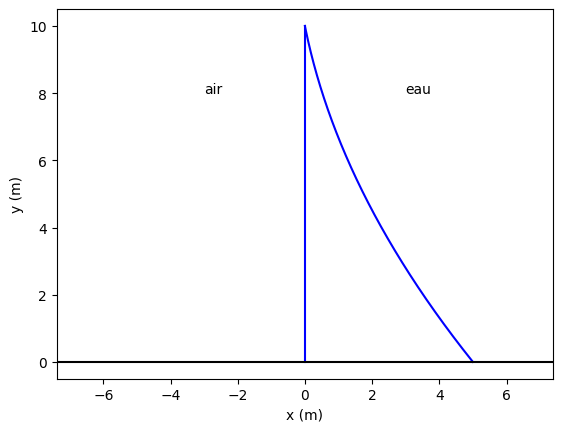

In [11]:
xa = 0
y = np.linspace(0, H, 1000)

plt.plot(feau(y), y, '-b')
plt.plot([xa, 0], [0, H], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

Calculons, dans l'hypothèse de l'équilibre statique translationnel, la rapport $\frac{T}{N}$. L'obtention de ce résultat nécessitant le calcul des forces de pression, rappelons comment déterminer ces dernières.
La relation

$$\theta = arctan(f'(y))$$

ne permet plus l'obtention d'une constante, car la dérivée de $f_{eau}$ est variable. Pour tout y, nous avons alors :

$$\theta = arctan(\frac{2ay}{H^2}-\frac{a+x_e}{H})$$

Nous pouvons constater que l'angle $\theta$ dépend également de la longueur de la digue : selon la valeur de la constante $x_e$, les forces de pression seront différentes, ce qui peut influencer la stabilité de la digue. Pour l'instant, concentrons-nous sur le cas $x_e = 5$m.
Créons tout d'abord la fonction dérivée de $f_{eau}$, et calculons l'angle $\theta$ pour tout y entre 0 et H :

In [12]:
def derivee_convexe(y):
    a = 3
    H = 10
    xe = 5
    return (2 * a * y / H**2) - (a + xe)/H

theta = np.arctan(derivee_convexe(y))

Maintenant, calculons les normes selon $u_x$ et $u_y$ des forces de pression et de gravité exercées sur la digue.

In [13]:
# Calcul des forces de pression
dl = 1 / np.cos(theta) 
F_px = -np.trapz(P(y) * np.cos(theta) * dl, y)
F_py = np.trapz(P(y) * np.sin(theta) * dl, y)

# Calcul du poids
y_convexe = np.linspace(0, H, 1000)
x_convexe = feau(y_convexe)
integrale_convexe = np.trapz(y_convexe, x_convexe)
volume_convexe = np.fabs(integrale_convexe * L)
Poids_convexe = 9.81 * volume_convexe * rho_beton

Ainsi, à l'équilibre mécanique :

In [14]:
# Équilibre mécanique
N_convexe = Poids_convexe - F_py
T_convexe = F_px

print(f"Réaction normale (N) : {N_convexe:.2e} N")
print(f"Réaction tangentielle (T) : {np.fabs(T_convexe):.2e} N")
print(f"Rapport T/N : {abs(T_convexe/N_convexe):.3f}")

Réaction normale (N) : 8.83e+05 N
Réaction tangentielle (T) : 4.90e+05 N
Rapport T/N : 0.556


Nous observons que le rapport $\frac{T}{N}$ est supérieur au coefficient de friction $\mu$ : la digue est alors instable. Cependant, comme mentionné plus tôt, la valeur de $x_e$ influence cette stabilité. Voyons donc ce qu'il en est pour $x_e = 6$m.

In [15]:
# Définition des fonctions
def feau_6(y):
    a = 3
    H = 10
    xe = 6
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe

def derivee_convexe_6(y):
    a = 3
    H = 10
    xe = 6
    return (2 * a * y) / (H**2) - (a + xe)/H

y_6 = np.linspace(0, H, 1000)

# Calcul des forces de pression
theta_6 = np.arctan(derivee_convexe_6(y_6))
dl_6 = 1 / np.cos(theta_6) 
F_px_6 = -np.trapz(P(y_6) * np.cos(theta_6) * dl_6, y_6)
F_py_6 = np.trapz(P(y_6) * np.sin(theta_6) * dl_6, y_6)

# Calcul du poids
x_6 = np.linspace(0, H, 1001)
y_6 = feau_6(x_6)
integrale_6 = np.trapz(x_6, y_6)
volume_6 = np.fabs(integrale_6) * L
Poids_6 = 9.81 * volume_6 * rho_beton

# Équilibre mécanique
N_6 = Poids_6 - F_py_6
T_6 = F_px_6

print(f"Réaction normale (N) : {N_6:.2e} N")
print(f"Réaction tangentielle (T) : {np.fabs(T_6):.2e} N")
print(f"Rapport T/N : {abs(T_6/N_6):.3f}")

Réaction normale (N) : 1.08e+06 N
Réaction tangentielle (T) : 4.90e+05 N
Rapport T/N : 0.455


Nous remarquons que pour $x_e = 6$m, la digue est stable. Elle présente par ailleurs de meilleures performances de stabilité que son homologue linéaire à $x_e=5$m. Il est ainsi utile de représenter graphiquement l'évolution de la stabilité de la digue selon le volume induit par la valeur de $x_e$. Comme la digue est instable pour $x_e=5$m, mais stable pour $x_e=6$m, prenant un grand nombre de valeurs de $x_e$ dans cet intervalle :

In [16]:
xe_valeurs = np.linspace(5, 6, 1000)
y_valeurs = np.linspace(0, H, 1000)
xe, y = np.meshgrid(xe_valeurs, y_valeurs, indexing='ij')

Définissons ensuite les nouvelles fonctions $f_{eau}$ et $f_{air}$, prenant cette fois-ci en entrée le paramètre $x_e$ :

In [17]:
def feau_xe(y, xe, a = 3, H = 10):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe

def derivee_convexe_xe(y, xe, a = 3, H = 10):
    return (2 * a * y) / (H**2) - (a + xe) / H

Dès à présent, nous pouvons calculer les projections des diverses forces exercées sur la digue. Commençons par les forces de pression.

In [18]:
# Calcul des paramètres de la pente
feau_valeurs = feau_xe(y, xe)
derivee_valeurs = derivee_convexe_xe(y, xe)
theta_valeurs = np.arctan(derivee_valeurs)
dl_valeurs = 1 / np.cos(theta_valeurs)

In [19]:
# Calcul des forces de pression
Px_valeurs = P(y) * np.cos(theta_valeurs) * dl_valeurs
Py_valeurs = P(y) * np.sin(theta_valeurs) * dl_valeurs
F_px_xe = np.trapz(Px_valeurs, y, axis=1)
F_py_xe = np.trapz(Py_valeurs, y, axis=1)

Poursuivons avec le calcul du poids.

In [20]:
# Calcul des surfaces et poids
integrale_xe = np.trapz(feau_valeurs, y)
volume_xe = np.abs(integrale_xe * L)
Poids_xe = 9.81 * volume_xe * rho_beton

Finalement, appliquons l'hypothèse de l'équilibre statique translationnel pour calculer les normes normales et tangentielles de la réaction du sol, et représentons graphiquement comment le rapport des deux varie selon le volume induit par $x_e$. A titre indicatif, nous tracerons également une droite à $\frac{T}{N} = 0.5$ afin de représenter la limite de stabilité.

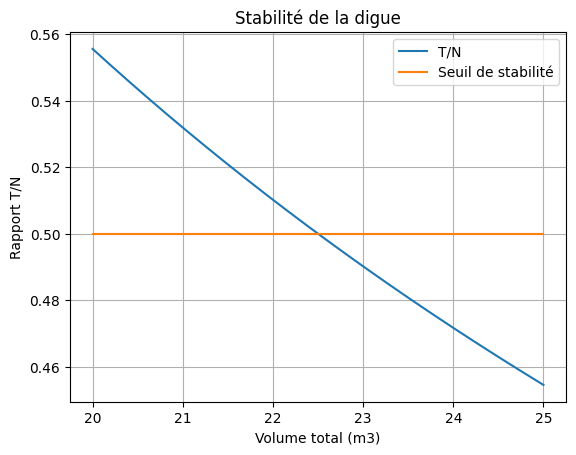

In [21]:
stabilite = np.ones_like(volume_xe) * 0.5

# Équilibre mécanique
N_xe = Poids_xe - F_py_xe
T_xe = F_px_xe

plt.plot(volume_xe, T_xe / N_xe, label="T/N")
plt.plot(volume_xe, stabilite, label="Seuil de stabilité")
plt.xlabel("Volume total (m3)")
plt.ylabel("Rapport T/N")
plt.title("Stabilité de la digue")
plt.legend()
plt.grid()
plt.show()

Nous observons que la digue convexe est stable pour un volume supérieur à $22.5 m^3$, c'est-à-dire pour $x_e \geq 5.5$.

En conclusion, la forme courbe de l'interface présente plusieurs avantages, permettant la réduction du volume de béton nécessaire à garder la digue en équilibre :
- Tout d'abord, une interface courbe permet de mieux répartir les forces hydrauliques sur la structure. Une partie des forces de pression est convertie en une composante verticale, mieux absorbée par le sol ou la fondation de la digue, réduisant ainsi la nécessité d'un volume de béton massif pour résister aux composantes horizontales.
- Ensuite, une forme courbe permet de mieux positionner le centre de gravité de la digue, ce qui maximise son effet stabilisateur.
- Finalement, une digue avec une interface courbe réduit le bras de levier des forces de pression, diminuant ainsi le moment de basculement : moins de poids est alors nécessaire pour contrebalancer ce moment.